# Detect messi demo

This notebook shows how to use a pretrained model in customized dataset to detect Lionel Messi.

We used one of the Messi videos in Youtube for demo, which is a scene of football game. We use a pretrained model (downloadable from [link](https://s3-ap-southeast-1.amazonaws.com/bigdl-models/object-detection/bigdl_messi_quantize.model) which is finetuned based on a SSD with VGG16 model for detection. It is able to detect Messi in the game. In the video Messi is identified with boxes and class scores are shown on top.

 ## Intialization

* import necesary libraries

In [1]:
import os
from IPython.display import Image, display
%pylab inline
from moviepy.editor import *

Populating the interactive namespace from numpy and matplotlib


* import zoo libraries

In [2]:
%matplotlib inline

from zoo.common.nncontext import *
from zoo.feature.image import *
from zoo.feature.common import ChainedPreprocessing
from zoo.models.image.common.image_config import ImageConfigure
from zoo.models.image.objectdetection import *

* init variables

In [3]:
sc = init_nncontext("Detect Messi Example")

## Prepare model and data

Download [model](https://s3-ap-southeast-1.amazonaws.com/bigdl-models/object-detection/bigdl_messi_quantize.model)

Download [Video Clip](https://s3-ap-southeast-1.amazonaws.com/bigdl-models/object-detection/messi_clip.mp4)

Move the model and video to the same directory with this notebook

## Load a pretrained model

In [4]:
model=ObjectDetector.load_model("bigdl_messi_quantize.model")

print 'load model done'

load model done


## Load data

In [5]:
path = "messi_clip.mp4"
myclip = VideoFileClip(path)

video_rdd = sc.parallelize(myclip.iter_frames(fps=5))
image_set = DistributedImageSet(video_rdd)

creating: createDistributedImageSet


## Define ImageConfigure

In [6]:
preprocess = ChainedPreprocessing([ImageResize(300, 300), ImageChannelNormalize(123.0, 117.0, 104.0), ImageMatToTensor(), ImageSetToSample()])
postprocess = ScaleDetection()

label_map = {0: '__background__', 1: 'messi'}
config = ImageConfigure(preprocess, postprocess, 2, label_map)

creating: createImageResize
creating: createImageChannelNormalize
creating: createImageMatToTensor
creating: createImageSetToSample
creating: createChainedPreprocessing
creating: createScaleDetection
creating: createImageConfigure


## Predict and visualize detection back to clips

In [7]:
output = model.predict_image_set(image_set, config)

visualizer = Visualizer(config.label_map())
visualized = visualizer(output).get_image(to_chw=False).collect()

creating: createVisualizer


## Save clips to file

In [8]:
clip = ImageSequenceClip(visualized, fps=5)

output_path = '/tmp/out.mp4'
%time clip.write_videofile(output_path, audio=False)
clip.write_gif("messi.gif")

[MoviePy] >>>> Building video /tmp/out.mp4
[MoviePy] Writing video /tmp/out.mp4


100%|██████████| 44/44 [00:00<00:00, 708.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /tmp/out.mp4 

CPU times: user 24.2 ms, sys: 4.93 ms, total: 29.2 ms
Wall time: 237 ms

[MoviePy] Building file messi.gif with imageio


100%|██████████| 44/44 [00:02<00:00, 15.18it/s]


## Display Messi Detection Video 

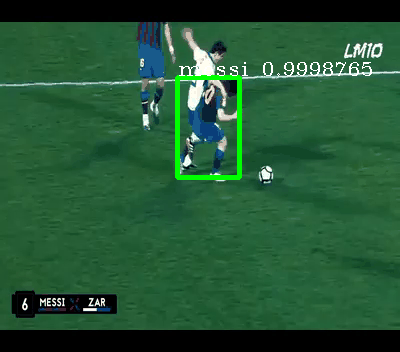

In [9]:
with open("messi.gif",'rb') as f:
    display(Image(f.read()))